In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
df=pd.read_csv(r"C:\Users\punee\OneDrive\Desktop\Transaction Fraud Model\rhmlmodel\Data\Raw\Transaction_fraud_data.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
len(df['type'].unique())

5

In [9]:
len(df['nameOrig'].unique())

6353307

In [10]:
len(df['nameDest'].unique())

2722362

In [11]:
df.rename(columns={
    'nameOrig': 'Sender',
    'nameDest': 'Receiver',
    'oldbalanceOrg': 'oldbalanceSender',
    'newbalanceOrig': 'newbalanceSender',
    'oldbalanceDest': 'oldbalanceReceiver',
    'newbalanceDest': 'newbalanceReceiver'
}, inplace=True)

In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [13]:
df['Sender'].value_counts()

Sender
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [14]:
df['Receiver'].value_counts()

Receiver
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [15]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [17]:
df['balance_change_sender'] = df['oldbalanceSender'] - df['newbalanceSender']
df['balance_change_receiver'] = df['oldbalanceReceiver'] - df['newbalanceReceiver']

In [18]:
df['mismatch_flag'] = (df['balance_change_receiver'] != -1 * df['balance_change_sender'])
df.head()

,step,type,amount,Sender,oldbalanceSender,newbalanceSender,Receiver,oldbalanceReceiver,newbalanceReceiver,isFraud,isFlaggedFraud,balance_change_sender,balance_change_receiver,mismatch_flag
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,True


In [19]:
print(f"Total Rows: {len(df)}")
print(f"Rows with Mismatch: {len(df[df['mismatch_flag']==1])}")
print(f"Percentage of Affected Transactions: {len(df[df['mismatch_flag']==1]) / len(df) * 100:.2f}%")


Total Rows: 6362620
Rows with Mismatch: 5346209
Percentage of Affected Transactions: 84.03%


In [20]:
df[df['mismatch_flag']==1].describe()
df[df['mismatch_flag']==1]['type'].value_counts()  

type
CASH_OUT    2168990
PAYMENT     1377250
CASH_IN     1234812
TRANSFER     527445
DEBIT         37712
Name: count, dtype: int64

In [21]:
df 

,step,type,amount,Sender,oldbalanceSender,newbalanceSender,Receiver,oldbalanceReceiver,newbalanceReceiver,isFraud,isFlaggedFraud,balance_change_sender,balance_change_receiver,mismatch_flag
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,21182.00,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,-339682.13,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,True


In [22]:
df

,step,type,amount,Sender,oldbalanceSender,newbalanceSender,Receiver,oldbalanceReceiver,newbalanceReceiver,isFraud,isFlaggedFraud,balance_change_sender,balance_change_receiver,mismatch_flag
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,21182.00,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,-339682.13,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,True


In [46]:
numeric_cols = ['step', 'amount', 'oldbalanceSender', 'newbalanceSender', 
                    'oldbalanceReceiver', 'newbalanceReceiver', 'balance_change_sender', 
                    'balance_change_receiver']
categorical_cols = ['type','isFraud', 'isFlaggedFraud', 'mismatch_flag']

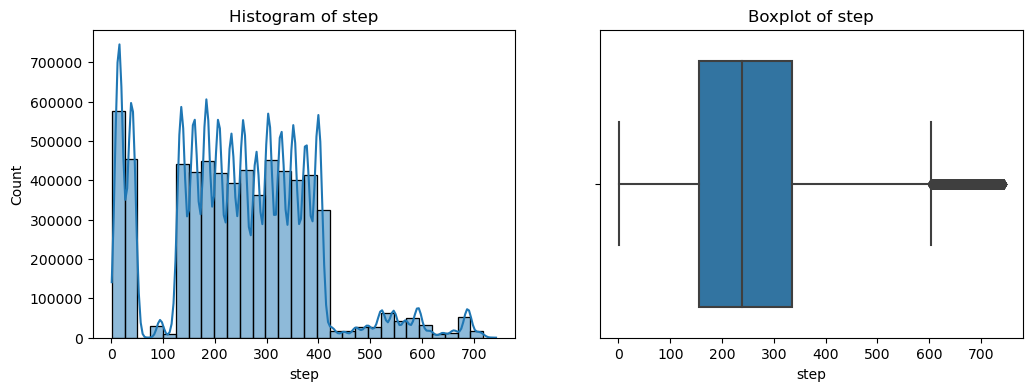

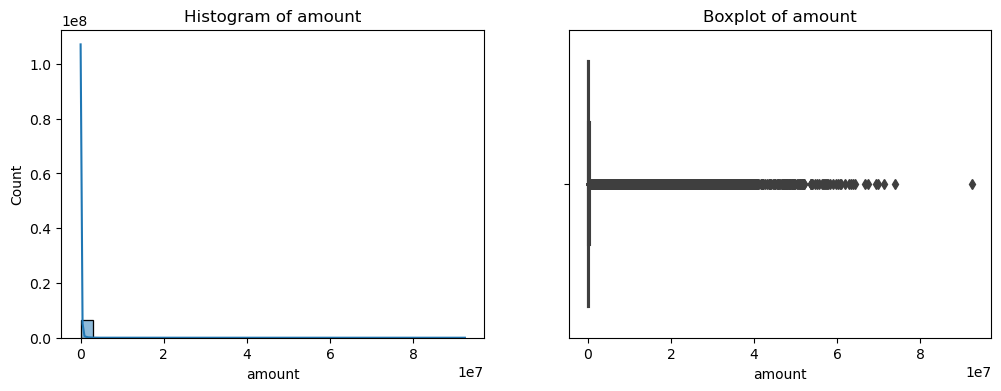

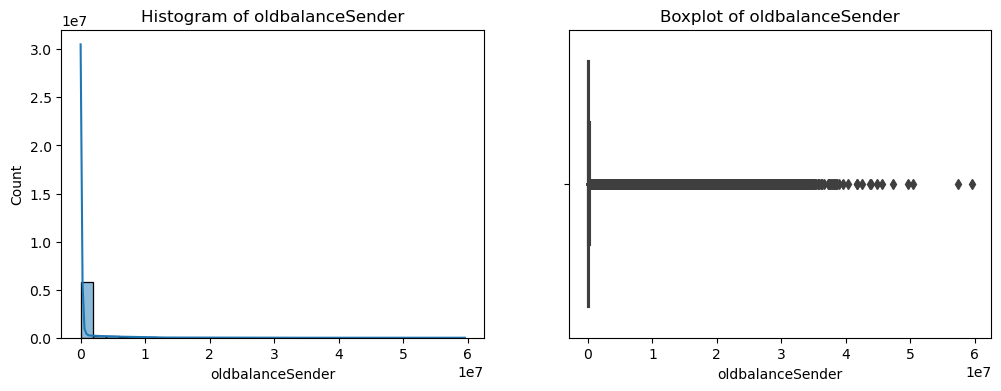

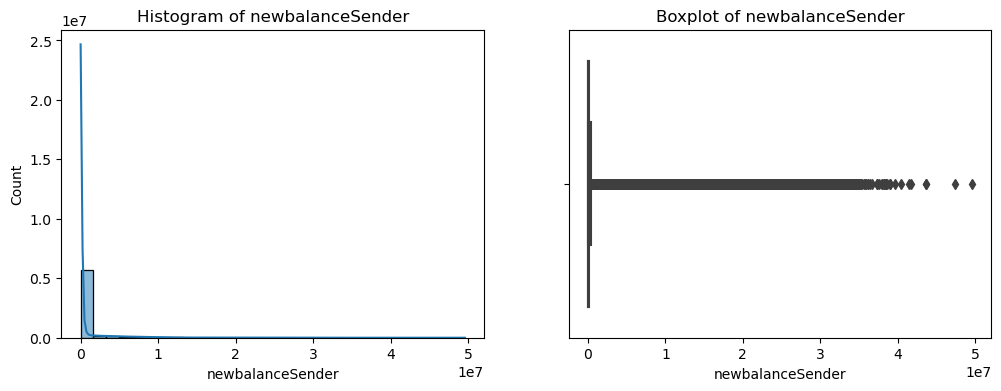

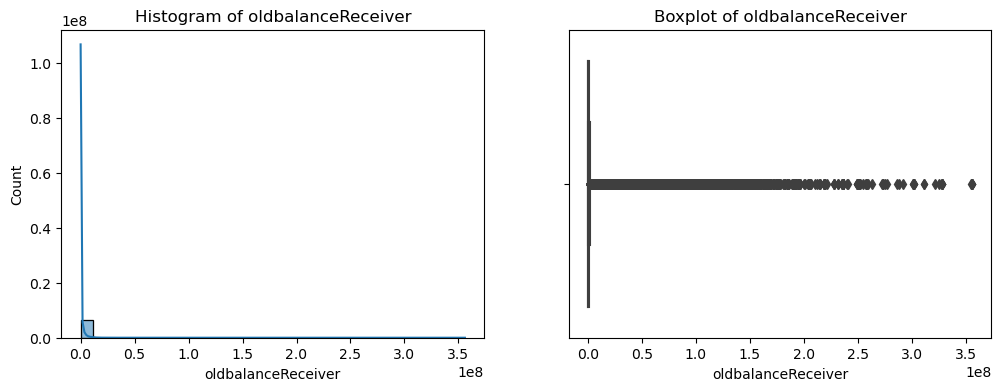

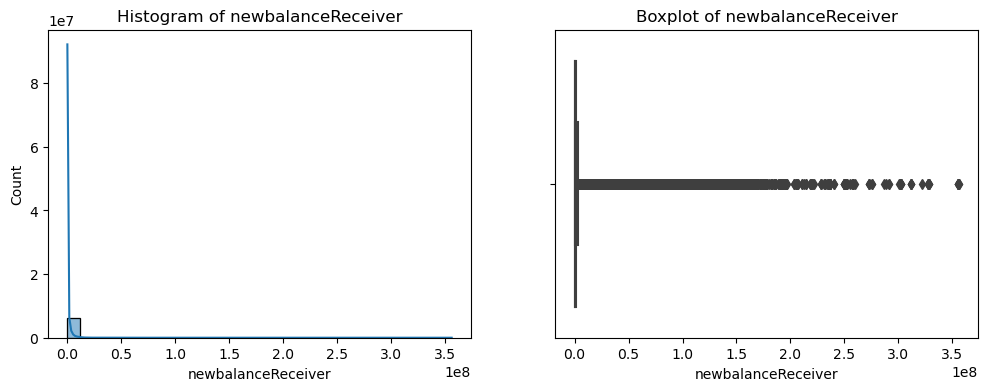

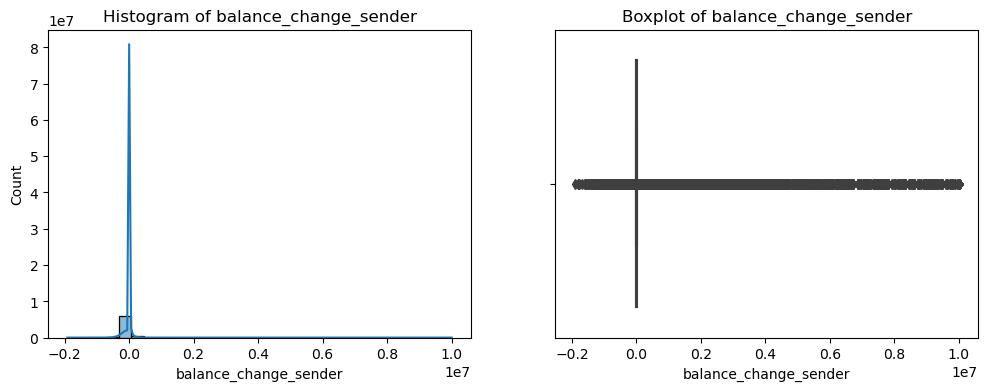

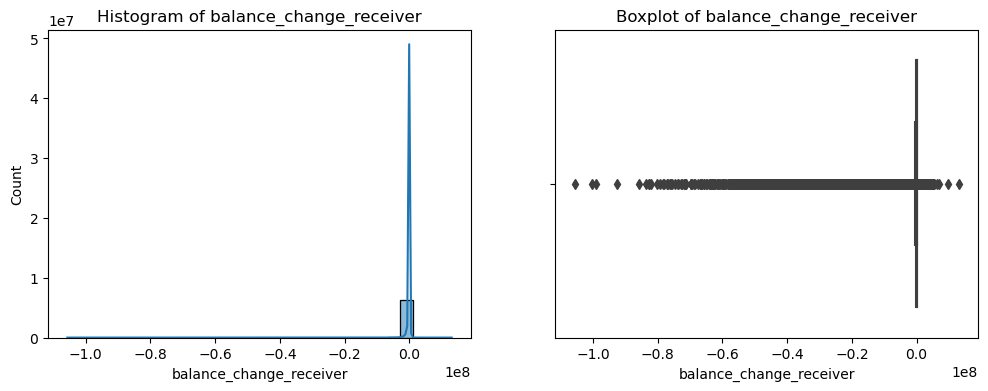

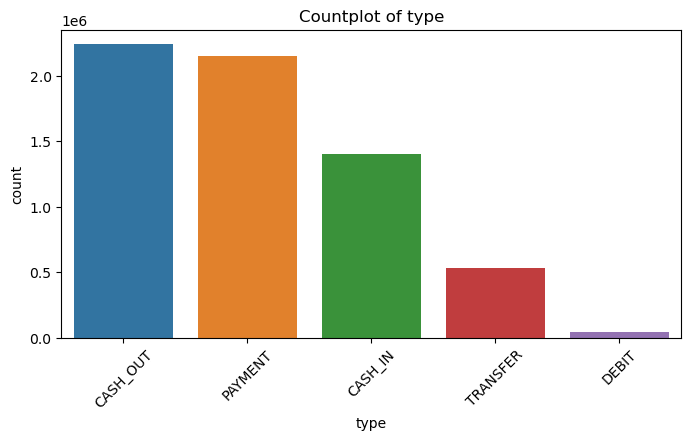

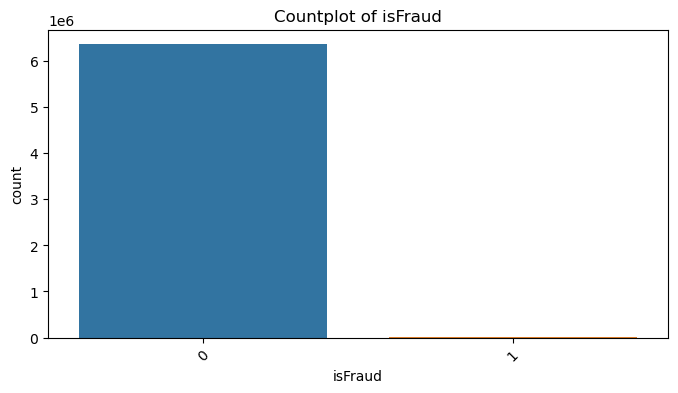

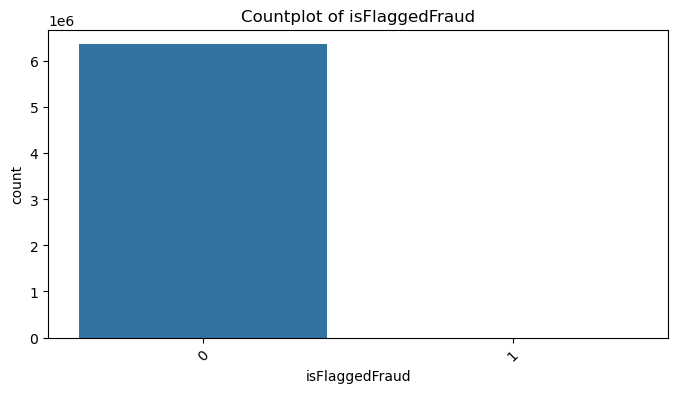

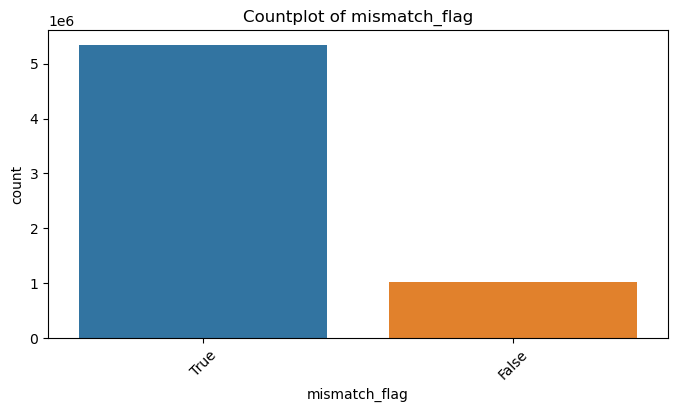

In [24]:
def plot_feature_distributions(df):
   
    
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')
        
        plt.show()
    
    # Plot categorical features
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[col], order=df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.show()


plot_feature_distributions(df)


In [25]:
#there is inconsistency in the data , this could be an indication of fraud of unclean data. 

In [26]:
#check if all the rows who mismatch are flagged as fraud

In [27]:

total_fraud_transactions = df[df['isFraud'] == 1].shape[0]  

fraud_in_mismatch = df[(df['mismatch_flag'] == 1) & (df['isFraud'] == 1)].shape[0]

total_mismatch = df[df['mismatch_flag'] == 1].shape[0]

fraud_count = df[df['mismatch_flag'] == 1]['isFraud'].sum()

print(f"Total Mismatched Transactions: {total_mismatch}")
print(f"Total Fraud in Mismatched Transactions: {fraud_count}")
print(f"Total Fraud Transactions in Dataset: {total_fraud_transactions}")
print(f"Percentage of ALL Fraud Transactions that are in Mismatched Rows: {fraud_in_mismatch / total_fraud_transactions * 100:.2f}%")


print("\nStatistical Summary of Mismatched Transactions:")
print(df[df['mismatch_flag'] == 1].describe())

print("\nTransaction Type Distribution in Mismatched Transactions:")
print(df[df['mismatch_flag'] == 1]['type'].value_counts())


Total Mismatched Transactions: 5346209
Total Fraud in Mismatched Transactions: 6036
Total Fraud Transactions in Dataset: 8213
Percentage of ALL Fraud Transactions that are in Mismatched Rows: 73.49%

Statistical Summary of Mismatched Transactions:
               step        amount  oldbalanceSender  newbalanceSender  \
count  5.346209e+06  5.346209e+06      5.346209e+06      5.346209e+06   
mean   2.422827e+02  2.045721e+05      9.002548e+05      9.223698e+05   
std    1.427639e+02  6.511755e+05      3.025403e+06      3.062219e+06   
min    1.000000e+00  1.000000e-02      0.000000e+00      0.000000e+00   
25%    1.550000e+02  1.899918e+04      3.200000e+01      0.000000e+00   
50%    2.370000e+02  1.020012e+05      2.087200e+04      0.000000e+00   
75%    3.340000e+02  2.314700e+05      1.256426e+05      1.708049e+05   
max    7.430000e+02  9.244552e+07      5.958504e+07      4.958504e+07   

       oldbalanceReceiver  newbalanceReceiver       isFraud  isFlaggedFraud  \
count        5.

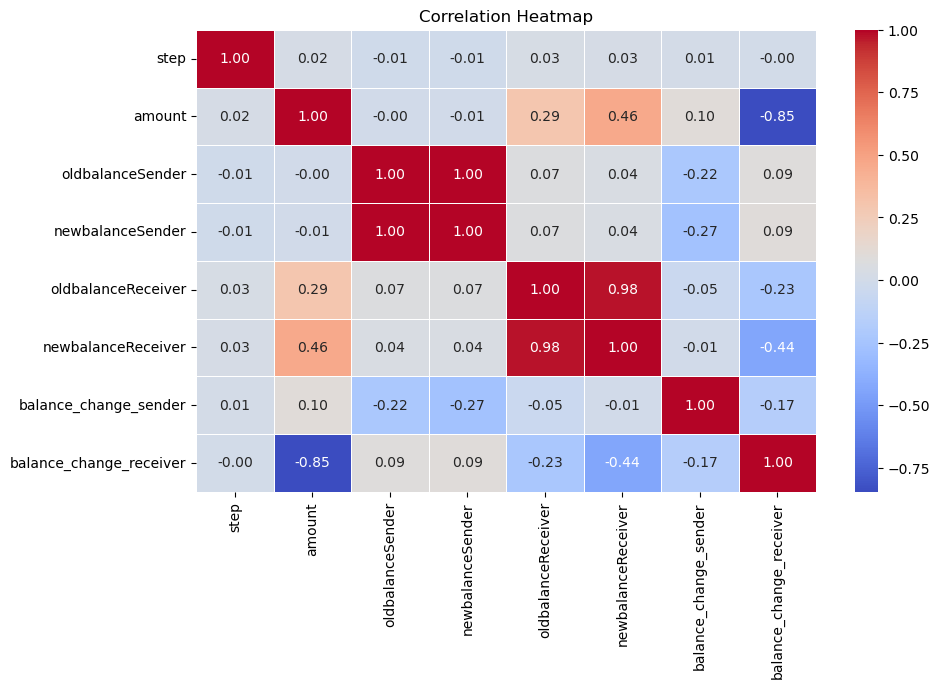

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# hence this a an important factor for fraud classification.

In [29]:
df = df.sort_values(by=['step'])

# Calculate previous transactions by sender
df['prev_transactions_sender'] = df.groupby('Sender').cumcount()

# Calculate previous receives by receiver
df['prev_receives_receiver'] = df.groupby('Receiver').cumcount()

In [31]:
df

,step,type,amount,Sender,oldbalanceSender,newbalanceSender,Receiver,oldbalanceReceiver,newbalanceReceiver,isFraud,isFlaggedFraud,balance_change_sender,balance_change_receiver,mismatch_flag,prev_transactions_sender,prev_receives_receiver
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,True,0,0
1801,1,PAYMENT,5157.05,C1562950869,1667.92,0.00,M2021835850,0.00,0.00,0,0,1667.92,0.00,True,0,0
1802,1,PAYMENT,5746.44,C845388562,0.00,0.00,M550572371,0.00,0.00,0,0,0.00,0.00,False,0,0
1803,1,PAYMENT,5607.36,C948424584,5202.00,0.00,M1447685190,0.00,0.00,0,0,5202.00,0.00,True,0,0
1804,1,PAYMENT,6360.79,C2027701910,3731.00,0.00,M1345293143,0.00,0.00,0,0,3731.00,0.00,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,339682.13,0.00,True,0,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,-339682.13,False,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,True,0,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27,True,0,2


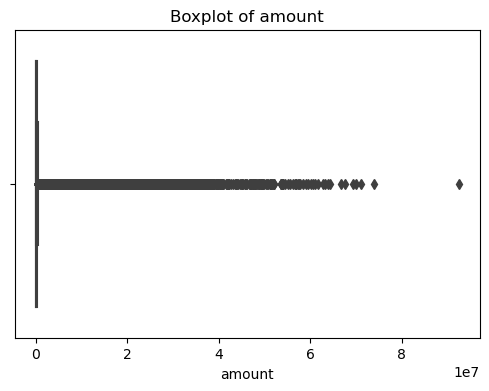

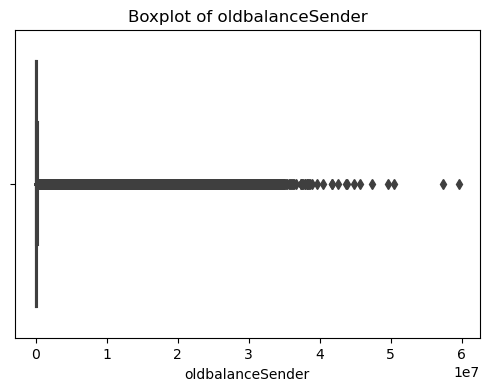

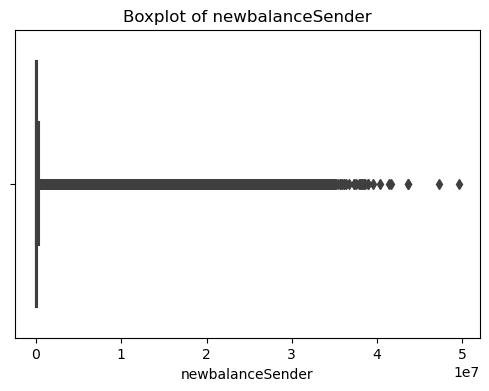

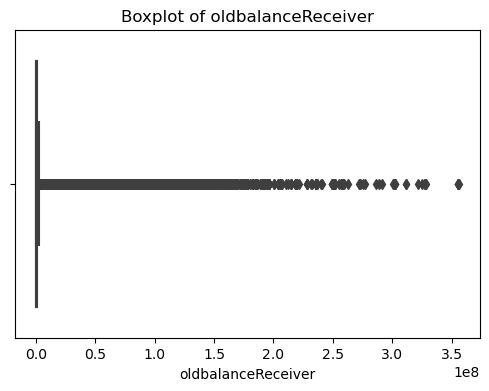

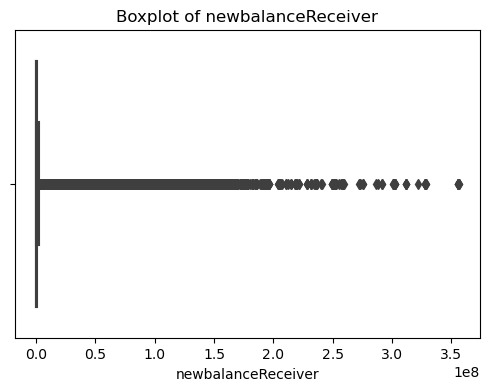

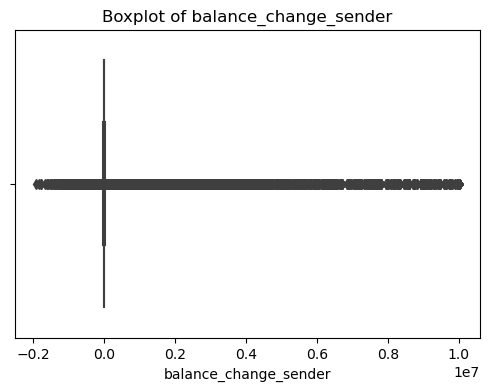

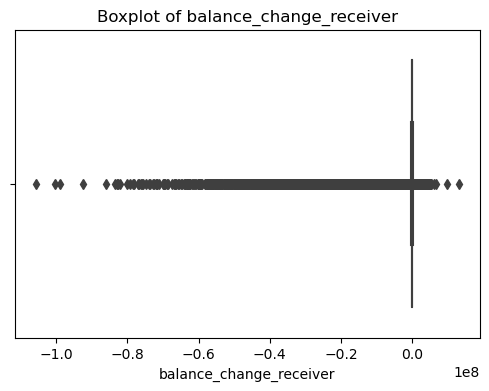

In [32]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



In [33]:
#outlier removal 

In [34]:
#first we check if the data is normally distributed 

In [35]:
# Anderson-Darling Test
df = df.sort_values(by=['step'])
col=['amount','oldbalanceSender', 'newbalanceSender', 'oldbalanceReceiver', 'newbalanceReceiver']
for col1 in col:
    result = stats.anderson(df[col1], dist='norm')
    print(f"Anderson-Darling Test Statistic for {col1}: {result.statistic:.5f}")

Anderson-Darling Test Statistic for amount: 1307686.40720
Anderson-Darling Test Statistic for oldbalanceSender: 1711582.66740
Anderson-Darling Test Statistic for newbalanceSender: 1692696.44548
Anderson-Darling Test Statistic for oldbalanceReceiver: 1234281.21738
Anderson-Darling Test Statistic for newbalanceReceiver: 1197644.04594


In [36]:
# Shapiro-Wilk Test
#not suitable for data more than 5000
col=['amount','oldbalanceSender', 'newbalanceSender', 'oldbalanceReceiver', 'newbalanceReceiver']
for col1 in col:
    shapiro_result = stats.shapiro(df[col1])
    print(f"Shapiro-Wilk Test Statistic for {col1}: {shapiro_result.statistic:.5f}, p-value: {shapiro_result.pvalue:.5f}")

C:\Users\punee\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test Statistic for amount: 0.19258, p-value: 0.00000
Shapiro-Wilk Test Statistic for oldbalanceSender: 0.32323, p-value: 0.00000
Shapiro-Wilk Test Statistic for newbalanceSender: 0.33066, p-value: 0.00000
Shapiro-Wilk Test Statistic for oldbalanceReceiver: 0.29884, p-value: 0.00000
Shapiro-Wilk Test Statistic for newbalanceReceiver: 0.30221, p-value: 0.00000


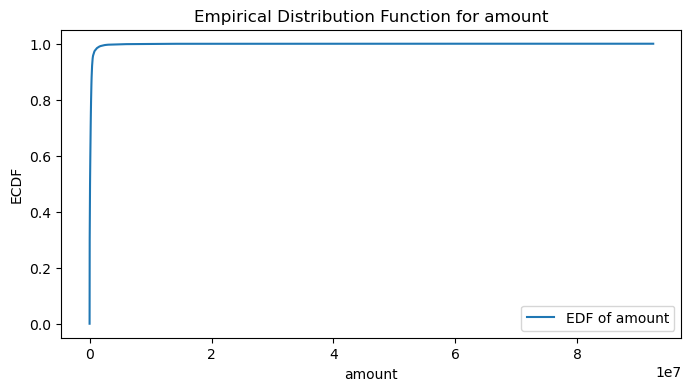

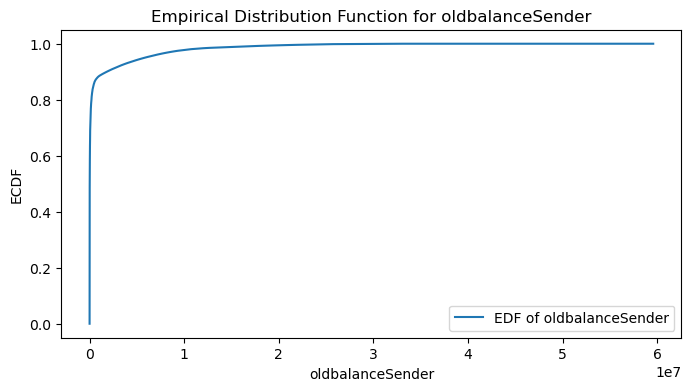

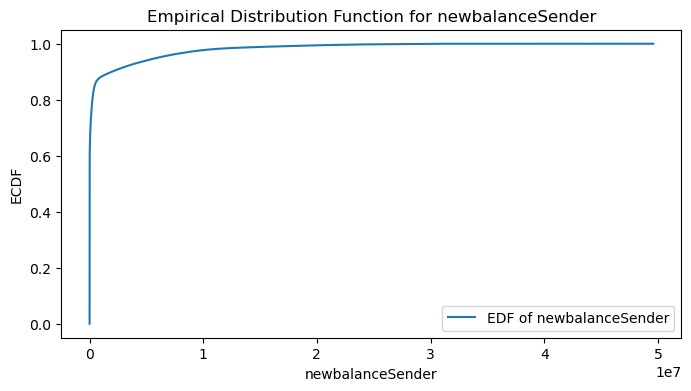

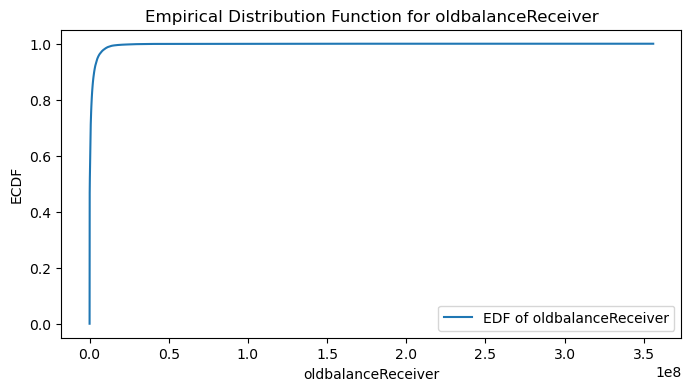

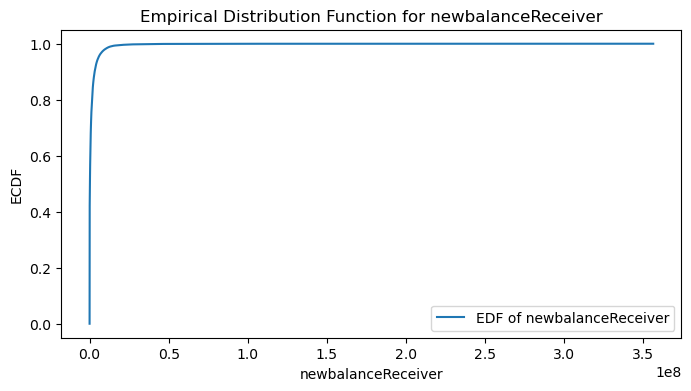

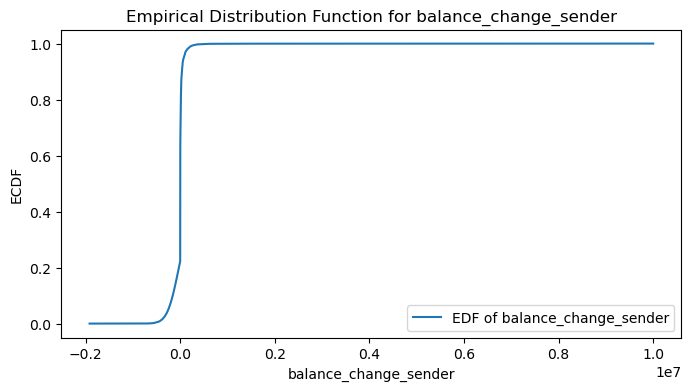

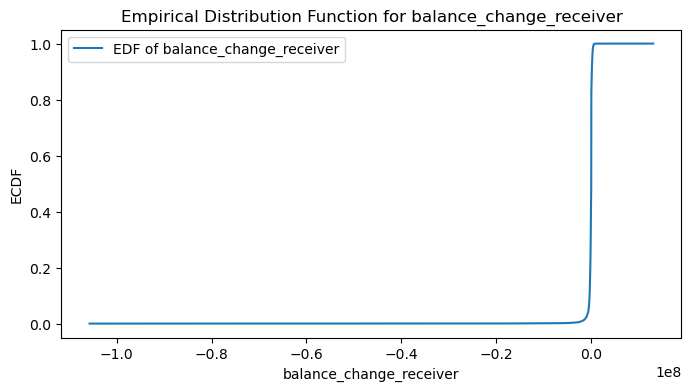

In [37]:
# Empirical Distribution Function (EDF)
for col in numeric_cols :
    ecdf = ECDF(df[col])
    plt.figure(figsize=(8, 4))
    plt.plot(ecdf.x, ecdf.y, label=f'EDF of {col}')
    plt.title(f'Empirical Distribution Function for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

In [38]:
#the data is not normalised and hence we can not use zscore method for outlier detection and removal
#Either we can log normalise the data and then use the z score method or we can go ahead and use IQR .We will try both

In [39]:
#log normalise the data 
df_log = df.copy()
for col in numeric_cols :
    df_log[col] = np.log1p(df[col])

C:\Users\punee\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\punee\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
df_log

,step,type,amount,Sender,oldbalanceSender,newbalanceSender,Receiver,oldbalanceReceiver,newbalanceReceiver,isFraud,isFlaggedFraud,balance_change_sender,balance_change_receiver,mismatch_flag,prev_transactions_sender,prev_receives_receiver
0,1,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.000000,0,0,9.194276,0.000000,True,0,0
2,1,TRANSFER,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.000000,1,0,5.204007,0.000000,True,0,0
3,1,CASH_OUT,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.000000,1,0,5.204007,9.960954,True,0,0
4,1,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.000000,0,0,9.364703,0.000000,True,0,0
5,1,PAYMENT,8.964275,C90045638,10.894162,10.737337,M573487274,0.000000,0.000000,0,0,8.964275,0.000000,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,14.045685,C1436118706,14.045685,0.000000,C1240760502,13.129270,14.382121,1,0,14.045685,NaN,True,0,5
6362614,743,TRANSFER,12.735768,C2013999242,12.735768,0.000000,C1850423904,0.000000,0.000000,1,0,12.735768,0.000000,True,0,0
6362615,743,CASH_OUT,12.735768,C786484425,12.735768,0.000000,C776919290,0.000000,12.735768,1,0,12.735768,NaN,False,0,1
6362616,743,TRANSFER,15.657870,C1529008245,15.657870,0.000000,C1881841831,0.000000,0.000000,1,0,15.657870,0.000000,True,0,0


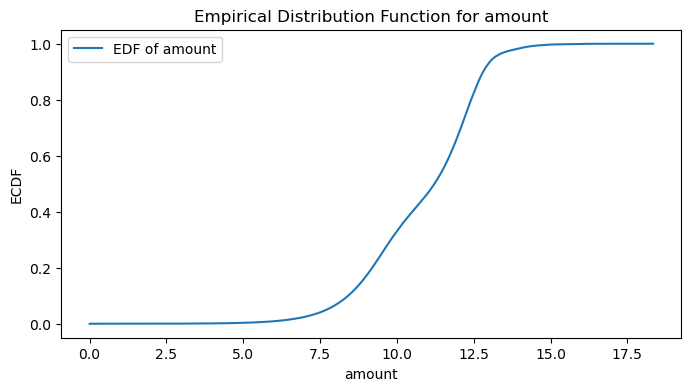

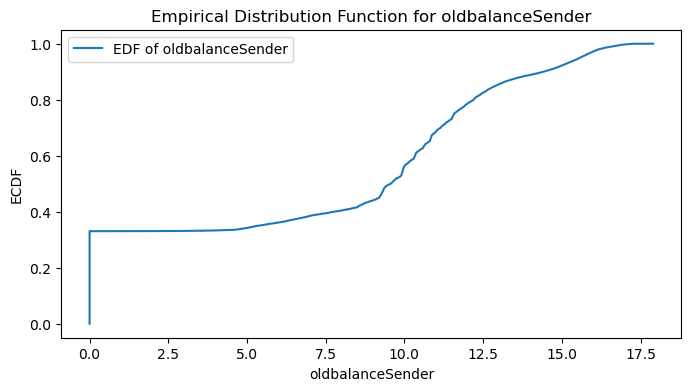

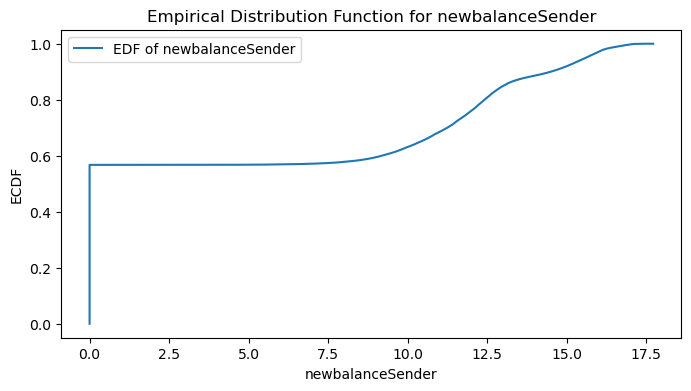

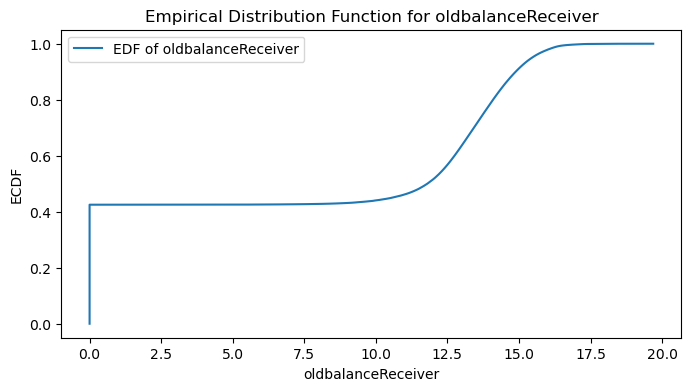

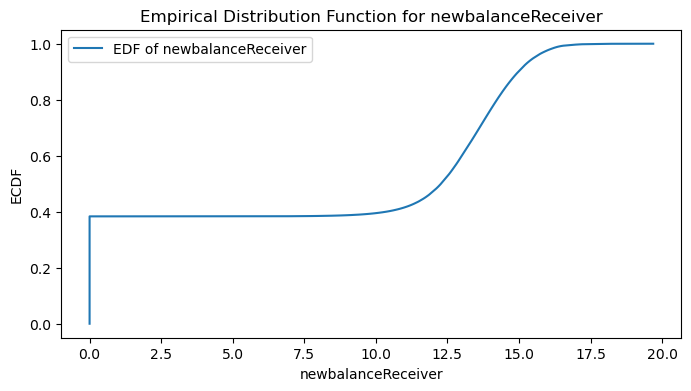

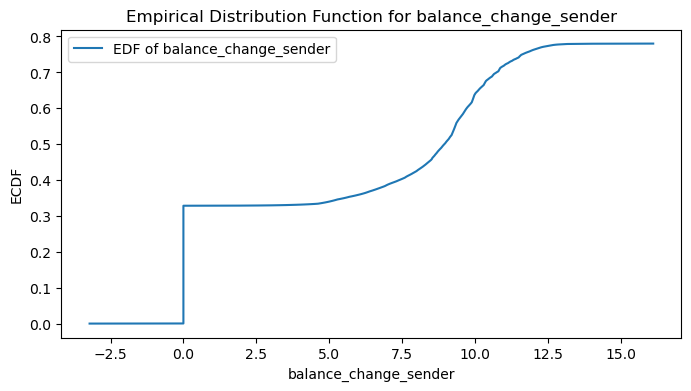

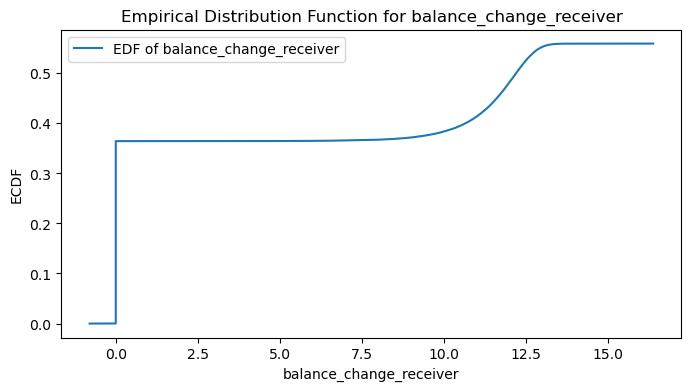

In [41]:
for col in numeric_cols :
    ecdf = ECDF(df_log[col])
    plt.figure(figsize=(8, 4))
    plt.plot(ecdf.x, ecdf.y, label=f'EDF of {col}')
    plt.title(f'Empirical Distribution Function for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

In [42]:
for col in numeric_cols :
    z_scores = np.abs(stats.zscore(df_log[col]))
    outliers = df_log[z_scores > 3]
    print(f'The no. of outliers for feature {col} are:{outliers.shape[0]}')

The no. of outliers for feature amount are:33093
The no. of outliers for feature oldbalanceSender are:0
The no. of outliers for feature newbalanceSender are:0
The no. of outliers for feature oldbalanceReceiver are:0
The no. of outliers for feature newbalanceReceiver are:0
The no. of outliers for feature balance_change_sender are:0
The no. of outliers for feature balance_change_receiver are:0


In [43]:
z_scores = np.abs(stats.zscore(df_log['amount']))
df_log_clean = df_log[z_scores <3]

df_log_clean

,step,type,amount,Sender,oldbalanceSender,newbalanceSender,Receiver,oldbalanceReceiver,newbalanceReceiver,isFraud,isFlaggedFraud,balance_change_sender,balance_change_receiver,mismatch_flag,prev_transactions_sender,prev_receives_receiver
0,1,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.000000,0,0,9.194276,0.0,True,0,0
4,1,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.000000,0,0,9.364703,0.0,True,0,0
5,1,PAYMENT,8.964275,C90045638,10.894162,10.737337,M573487274,0.000000,0.000000,0,0,8.964275,0.0,True,0,0
6,1,PAYMENT,8.869085,C154988899,12.118312,12.078740,M408069119,0.000000,0.000000,0,0,8.869085,0.0,True,0,0
7,1,PAYMENT,8.969878,C1912850431,12.078740,12.033067,M633326333,0.000000,0.000000,0,0,8.969878,0.0,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,14.045685,C1436118706,14.045685,0.000000,C1240760502,13.129270,14.382121,1,0,14.045685,NaN,True,0,5
6362614,743,TRANSFER,12.735768,C2013999242,12.735768,0.000000,C1850423904,0.000000,0.000000,1,0,12.735768,0.0,True,0,0
6362615,743,CASH_OUT,12.735768,C786484425,12.735768,0.000000,C776919290,0.000000,12.735768,1,0,12.735768,NaN,False,0,1
6362616,743,TRANSFER,15.657870,C1529008245,15.657870,0.000000,C1881841831,0.000000,0.000000,1,0,15.657870,0.0,True,0,0


In [47]:

# Compute Q1, Q3, and IQR for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Compute lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dictionary to store outliers per feature
outliers_dict = {}

# Detect outliers for each column separately
for feature in numeric_cols:
    outliers_feature = df[(df[feature] < lower_bound.loc[feature]) | (df[feature] > upper_bound.loc[feature])]
    outliers_dict[feature] = outliers_feature
    print(f"Outliers in {feature}: {outliers_feature.shape[0]}")

# Remove outliers from each feature separately
df_clean = df.copy()
for feature in numeric_cols:
    df_clean = df_clean[(df_clean[feature] >= lower_bound.loc[feature]) & (df_clean[feature] <= upper_bound.loc[feature])]

# Total Outliers
total_outliers = df.shape[0] - df_clean.shape[0]

print(f"\nOriginal Data Size: {df.shape[0]}")
print(f"Total Outliers Detected: {total_outliers}")
print(f"Cleaned Data Size: {df_clean.shape[0]}")


Outliers in step: 102688
Outliers in amount: 338078
Outliers in oldbalanceSender: 1112507
Outliers in newbalanceSender: 1053391
Outliers in oldbalanceReceiver: 786135
Outliers in newbalanceReceiver: 738527
Outliers in balance_change_sender: 2139299
Outliers in balance_change_receiver: 886695

Original Data Size: 6362620
Total Outliers Detected: 3098865
Cleaned Data Size: 3263755


In [48]:
df_clean['type'] = LabelEncoder().fit_transform(df_clean['type']) 

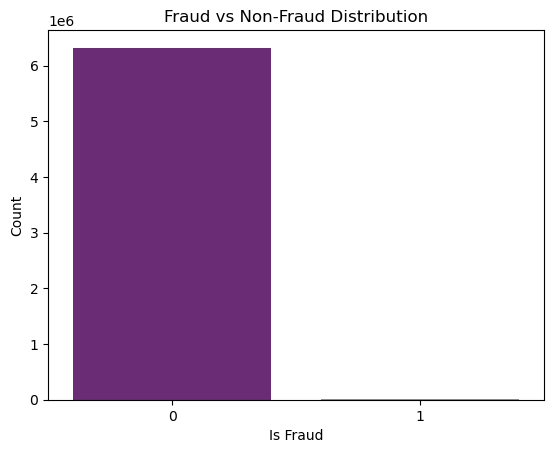

In [49]:
sns.countplot(data=df_clean, x='isFraud', palette='magma')
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

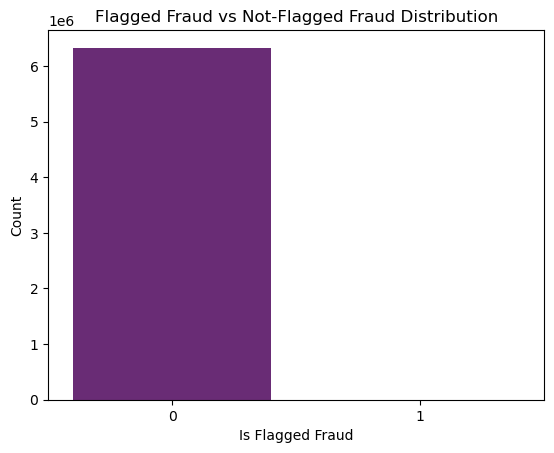

In [50]:
sns.countplot(data=df_clean, x='isFlaggedFraud', palette='magma')
plt.title('Flagged Fraud vs Not-Flagged Fraud Distribution')
plt.xlabel('Is Flagged Fraud')
plt.ylabel('Count')
plt.show()


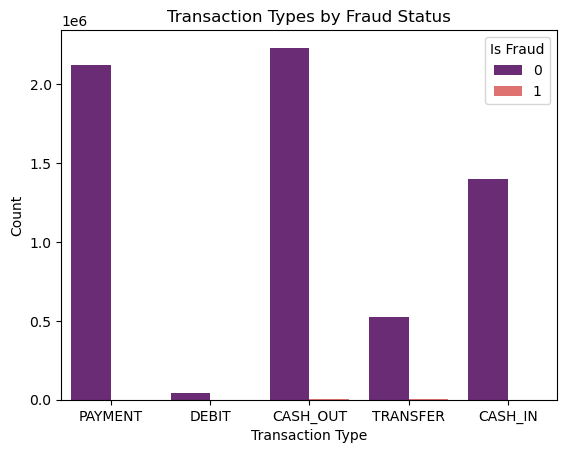

In [51]:
sns.countplot(data=df_clean, x='type', hue='isFraud', palette='magma')
plt.title('Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()


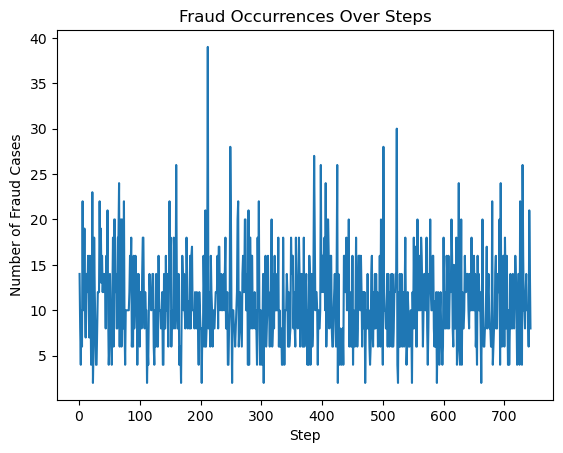

In [52]:
fraud_by_step = df_clean[df_clean['isFraud'] == 1].groupby('step').size()
fraud_by_step.plot(kind='line', title='Fraud Occurrences Over Steps')
plt.xlabel('Step')
plt.ylabel('Number of Fraud Cases')
plt.show()

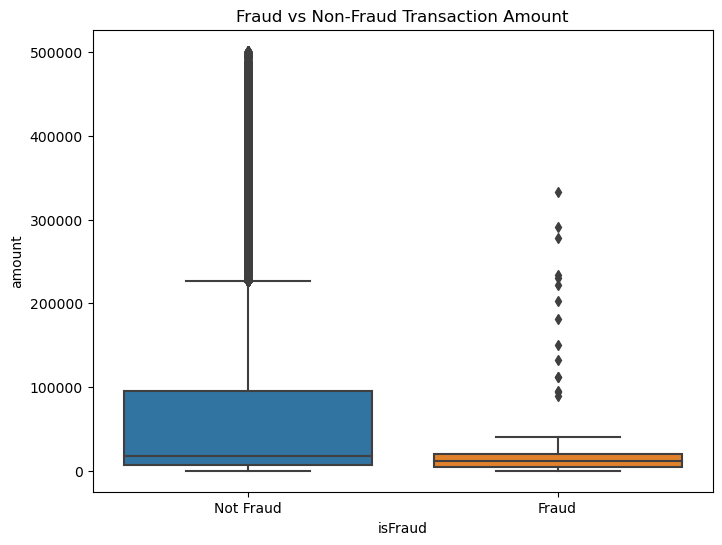

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['isFraud'], y=df_clean['amount'])
plt.title('Fraud vs Non-Fraud Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()


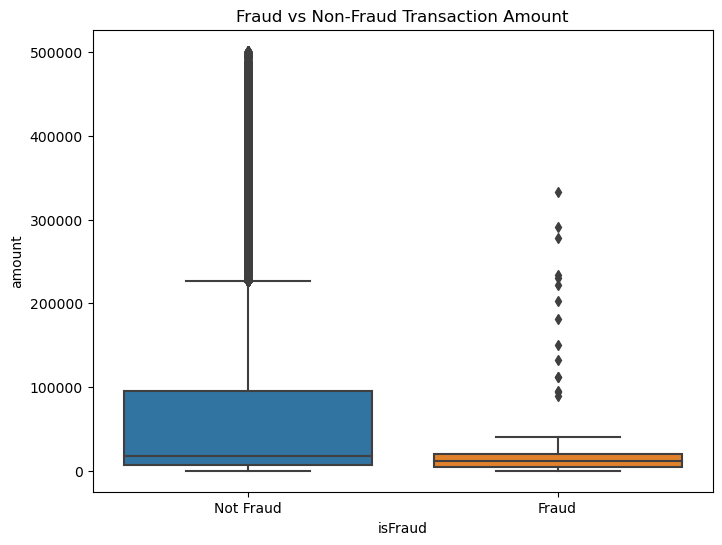

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['isFraud'], y=df_clean['amount'])
plt.title('Fraud vs Non-Fraud Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()


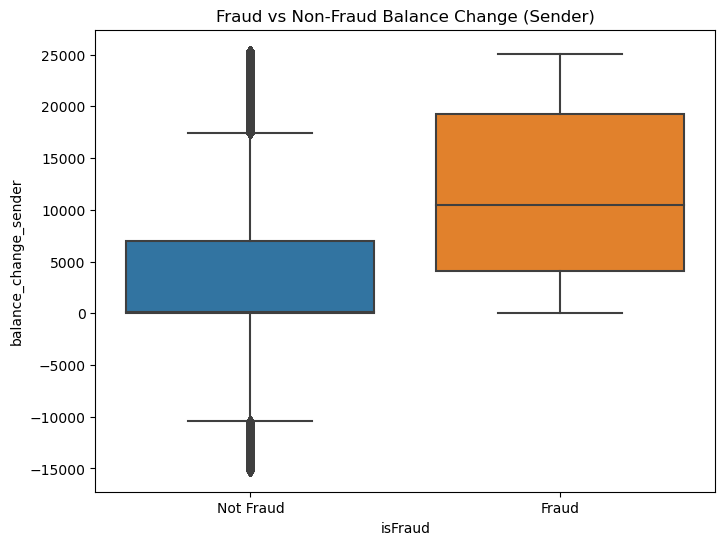

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['isFraud'], y=df_clean['balance_change_sender'])
plt.title('Fraud vs Non-Fraud Balance Change (Sender)')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()


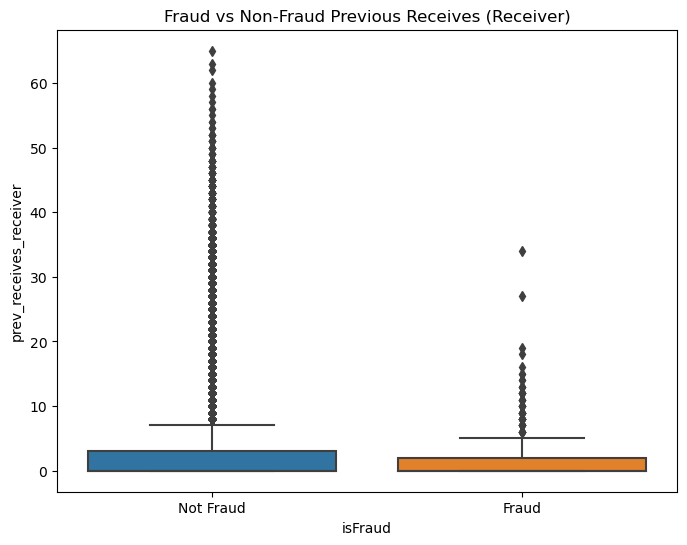

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['isFraud'], y=df_clean['prev_receives_receiver'])
plt.title('Fraud vs Non-Fraud Previous Receives (Receiver)')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()


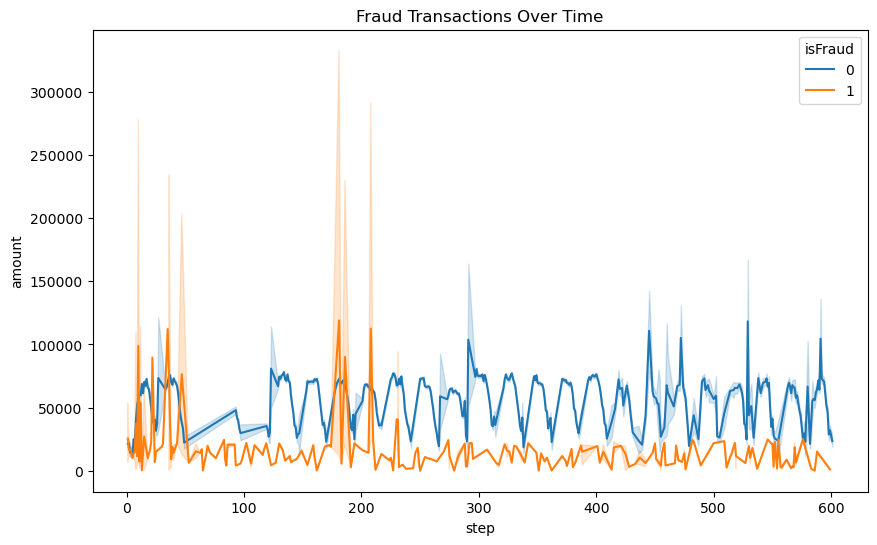

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="step", y="amount", hue="isFraud", data=df_clean)
plt.title("Fraud Transactions Over Time")
plt.show()


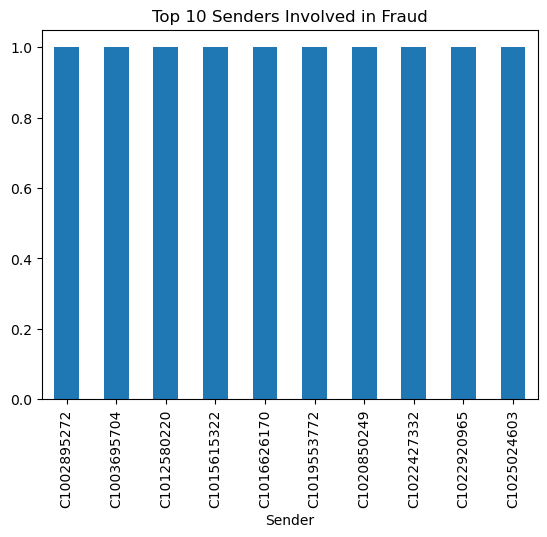

In [71]:
df_clean.groupby("Sender")["isFraud"].sum().nlargest(10).plot(kind="bar")
plt.title("Top 10 Senders Involved in Fraud")
plt.show()


In [72]:

processed_path = r"C:\Users\punee\OneDrive\Desktop\Transaction Fraud Model\rhmlmodel\Data\Processed\Transaction_fraud_data_processed.csv"

# Save the DataFrame as a CSV file
df.to_csv(processed_path, index=False)
